# E-Commerce Customer Analytics Project
# Author: Sujal Maharjan
# Objective: Analyze customer behavior to extract actionable business insights


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)

# Style
sns.set_style("whitegrid")

# Section 1 : Data Understanding 

In [8]:
df = pd.read_csv("../data/E-commerce_Customer_Behavior.csv")
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [9]:
df.shape

(350, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [11]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [ ]:
df.isnull().sum() #Checking the missing values

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [13]:
df.duplicated().sum() #check Duplicates

np.int64(0)

In [14]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [15]:
df.dtypes

Customer ID                   int64
Gender                       object
Age                           int64
City                         object
Membership Type              object
Total Spend                 float64
Items Purchased               int64
Average Rating              float64
Discount Applied               bool
Days Since Last Purchase      int64
Satisfaction Level           object
dtype: object

In [16]:
df.columns = df.columns.str.lower().str.replace(" ","_")
df.columns

Index(['customer_id', 'gender', 'age', 'city', 'membership_type',
       'total_spend', 'items_purchased', 'average_rating', 'discount_applied',
       'days_since_last_purchase', 'satisfaction_level'],
      dtype='object')

# Section 2 : Data Cleaning 

In [17]:
#Investigating the missing values  
df[df.isnull().any(axis=1)]

,customer_id,gender,age,city,membership_type,total_spend,items_purchased,average_rating,discount_applied,days_since_last_purchase,satisfaction_level
71,172,Female,37,Houston,Bronze,420.8,7,3.1,False,21,NaN
143,244,Female,37,Houston,Bronze,430.8,7,3.4,False,23,NaN


In [18]:
df = df.dropna()
df.shape

(348, 11)

# Section 3 : Descriptive Statistics

In [19]:
df.describe().round(2)

,customer_id,age,total_spend,items_purchased,average_rating,days_since_last_purchase
count,348.00,348.00,348.00,348.00,348.00,348.00
mean,275.89,33.58,847.79,12.63,4.02,26.61
std,101.30,4.88,361.69,4.15,0.58,13.47
min,101.00,26.00,410.80,7.00,3.00,9.00
25%,188.75,30.00,505.75,9.00,3.50,15.00
50%,276.50,32.00,780.20,12.00,4.10,23.00
75%,363.25,37.00,1160.60,15.00,4.50,38.00
max,450.00,43.00,1520.10,21.00,4.90,63.00


Average age : 33.6years and Age range : 26-43 ("Target marketing campagins toward young urban professionals")
purchase frequency : Average Items Purchased: 12.63 and Range: 7 – 21 

# Section 5 : Correlation Analysis

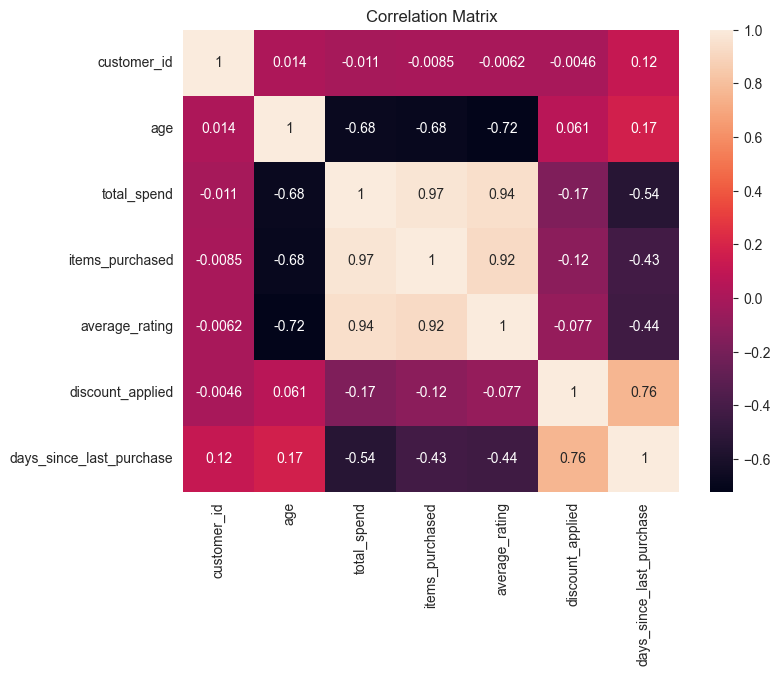

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix")
plt.show()


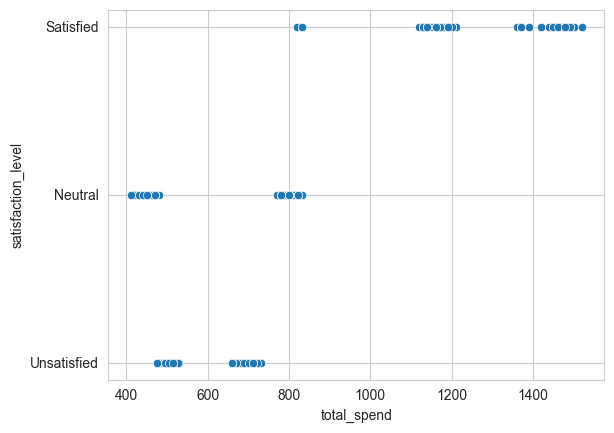

In [22]:
#Spending vs Satisfaction
sns.scatterplot(x='total_spend', y='satisfaction_level', data=df)
plt.show()


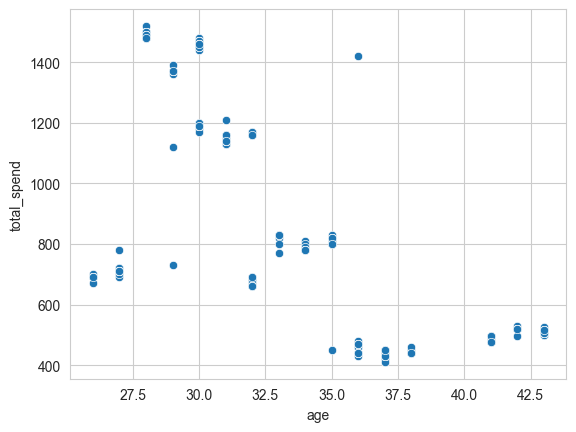

In [24]:
#Age vs Spending 
sns.scatterplot(x='age', y='total_spend', data=df)
plt.show()


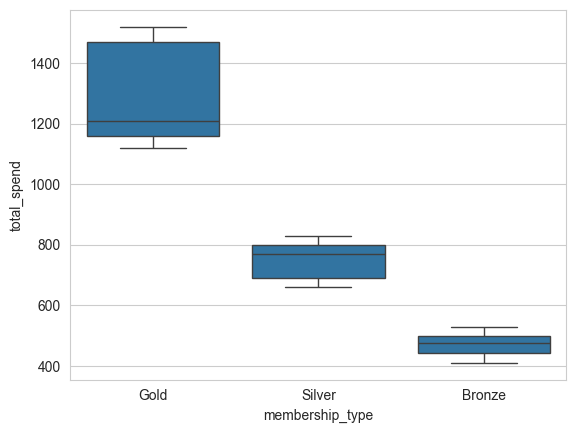

In [ ]:
#Memberhsip vs Average Spend
sns.boxplot(x='membership_type', y='total_spend', data=df)
plt.show()


In [26]:
df.to_csv("../data/E-commerce_Customer_Behavior.csv")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/E-commerce_Customer_Behavior.csv")
# Check for missing values
print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
     'Column': missing.index,
     'Missing_Count': missing.values,
     'Percentage': missing_pct.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
     print(missing_df.to_string(index=False))
else:
     print("✅ No missing values found!")

MISSING VALUES ANALYSIS
✅ No missing values found!


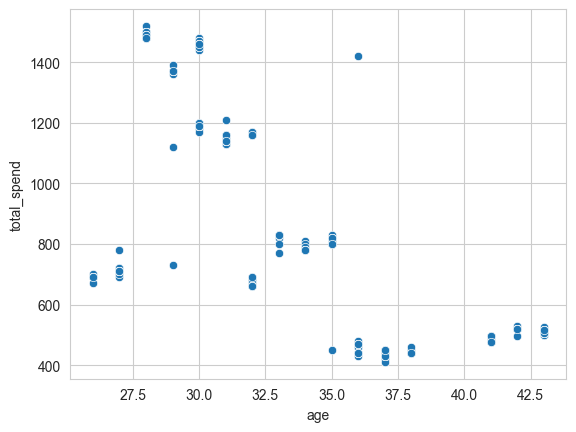

In [4]:
sns.scatterplot(x="age", y="total_spend", data=df)
plt.show()